In [3]:
from Bio import Phylo
import numpy as np
import math
import random
from numpy.random import default_rng
rng = default_rng() # random number generator

In [1]:
# set up parameters 
u0 = 1e-6 # mutation rate of chromosome
u1 = 1e-4 # mutation rate of gene locus
a = 0.02 # gene gain rate 
b = 0.02 # gene loss rate 
n = 10 # number of initial copies, must be greater than 5 to push the program to run
l = 20 # length of the gene sequence (AA)

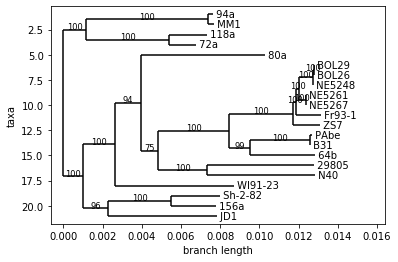

In [7]:
tre = Phylo.read("Bb_genome_reduced.tree", "newick") # genome tree of B.burgdorferi
Phylo.draw(tre)

In [9]:
# get taxa names
terminal_clades = tre.get_terminals()
tips = []
for tip in terminal_clades:
    tips.append(tip.name)
print(tips)

['94a', 'MM1', '118a', '72a', '80a', 'BOL29', 'BOL26', 'NE5248', 'NE5261', 'NE5267', 'Fr93-1', 'ZS7', 'PAbe', 'B31', '64b', '29805', 'N40', 'WI91-23', 'Sh-2-82', '156a', 'JD1']


In [212]:
# get branch lengths from root to each leaf
branch_lengths = {}
for tip in tips:
    path = tre.get_path(tip)
    lengths = [clade.branch_length for clade in path]
    lengths = np.asarray(lengths)/u0 # convert branch length to time
    branch_lengths[tip] = lengths
print(branch_lengths)

{'94a': array([1147.7927, 6241.3991,  269.7875]), 'MM1': array([1147.7927, 6241.3991,  308.672 ]), '118a': array([1147.7927, 4247.8301, 1949.2208]), '72a': array([1147.7927, 4247.8301, 1369.6127]), '80a': array([1008.5381, 1623.92  , 1338.7139, 6292.5453]), 'BOL29': array([1.0085381e+03, 1.6239200e+03, 1.3387139e+03, 8.8052240e+02,
       3.6192905e+03, 3.2536490e+03, 1.5747860e+02, 1.3284050e+02,
       7.0984370e+02, 7.2323400e+01, 5.6230000e-01]), 'BOL26': array([1.0085381e+03, 1.6239200e+03, 1.3387139e+03, 8.8052240e+02,
       3.6192905e+03, 3.2536490e+03, 1.5747860e+02, 1.3284050e+02,
       7.0984370e+02, 7.2323400e+01, 5.6230000e-01]), 'NE5248': array([1008.5381, 1623.92  , 1338.7139,  880.5224, 3619.2905, 3253.649 ,
        157.4786,  132.8405,  709.8437,   36.1346]), 'NE5261': array([1.0085381e+03, 1.6239200e+03, 1.3387139e+03, 8.8052240e+02,
       3.6192905e+03, 3.2536490e+03, 1.5747860e+02, 1.3284050e+02,
       3.6681620e+02, 5.6230000e-01]), 'NE5267': array([1.0085381e+0

In [269]:
def random_protein_sequence(l, n):
    AA = ('A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V')
    copies = []
    seq = ''.join(np.random.choice(AA) for _ in range(l))
    copies.extend([seq]*n)
    return copies

In [217]:
def mutation(genes, prob):
    for i in range(len(genes)):
        n_mut =  rng.poisson(prob) # determine how many sites to be mutated
        if n_mut > 0:
            seq = list(genes[i])
            sites_mut = random.sample(range(l), n_mut) # choose the sites to mutate
            for site in sites_mut: # mutate the sites one by one
                AA = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']
                ori = seq[site]
                AA.remove(ori) # remove the original letter to avoid sampling the same one
                seq[site] = np.random.choice(AA) # random substitution
            genes[i] = ''.join(seq)
    return(genes) 

In [218]:
def duplication(genes, prob):
    n_gain = rng.poisson(prob) # determine how many copies to be duplicated
    if n_gain > 0:
        gene_gain = random.sample(genes, n_gain) # choose the copies to duplicate 
        genes = genes + gene_gain # add items to the gene set
    return(genes)

In [219]:
def deletion(genes, prob):
    n_loss = rng.poisson(prob) # determine how many copies to be deleted
    if n_loss > 0:
        gene_loss = random.sample(genes, n_loss) # choose the copies to delete
        for item in gene_loss: # remove items from the set one by one
            genes.remove(item)
    return(genes)

In [213]:
def write_fasta(dictionary, filename):
    import textwrap
    with open(filename, "w") as outfile:
        for key, value in dictionary.items():
            outfile.write(">" + key + "\n")
            outfile.write("\n".join(textwrap.wrap(value, 60)))
            outfile.write("\n")

In [19]:
### Main simulator ###
# initiate the root gene set 
genes = random_protein_sequence(l, n)
sim = {}

# tree_walking
for taxon in tips: 
    for time in branch_lengths[taxon]: 
        p_mut = 1 - math.exp(-(u1*time)) # probability of mutation
        p_gain = (a/(a+b))*(1-math.exp(-((a+b)*time))) # probability of gain
        p_loss = 1 - p_gain # probability of loss

        genes = mutation(genes, p_mut) 
        genes = duplication(genes, p_gain) 
        genes = deletion(genes, p_loss)
        
        for i in range(len(genes)):
            sim["%s_%i" %(taxon, (i+1))] = genes[i]
            
print("Simulation is done!")    

# export simulated sequences to a fasta file
write_fasta(sim, "bb_vls_sim.fas")
print("Success! File written") 


NameError: name 'random_protein_sequence' is not defined

6